<a href="https://colab.research.google.com/github/heorhiiberezovskyi/AirbusShipDetection/blob/main/AirbusShipDetectionDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
annotations_file = os.path.join('/content/train_ship_segmentations_v2.csv')
assert os.path.exists(annotations_file)

In [10]:
import pandas as pd
from pandas import DataFrame
from typing import Dict, List

def to_dict(table: DataFrame) -> Dict[str, List[str]]:
    state_dict = {}
    not_nan = table['EncodedPixels'].notna()
    for index, row in table[not_nan].iterrows():
        image_id = row['ImageId']
        if image_id not in state_dict.keys():
            state_dict[image_id] = []
        na = row.isna()
        if not na['EncodedPixels']:
            state_dict[image_id].append(row['EncodedPixels'])
    return state_dict


In [11]:
table = pd.read_csv(annotations_file, sep=',')
image_names = table['ImageId'].unique().tolist()
ships_encodings = to_dict(table)

In [12]:
def get_ships_counts(encoded_pixels: Dict[str, List[str]], image_ids: List[str]) -> Dict[int, int]:
    ships_counts = {}
    for image_id in image_ids:
        if image_id not in encoded_pixels.keys():
            count = 0
        else:
            count = len(encoded_pixels[image_id])
        if count not in ships_counts.keys():
            ships_counts[count] = 0
        ships_counts[count] += 1
    result = dict(sorted(ships_counts.items()))
    return result

In [13]:
ships_counts = get_ships_counts(encoded_pixels=ships_encodings, image_ids=image_names)
print(ships_counts)

{0: 150000, 1: 27104, 2: 7674, 3: 2954, 4: 1622, 5: 925, 6: 657, 7: 406, 8: 318, 9: 243, 10: 168, 11: 144, 12: 124, 13: 75, 14: 76, 15: 66}


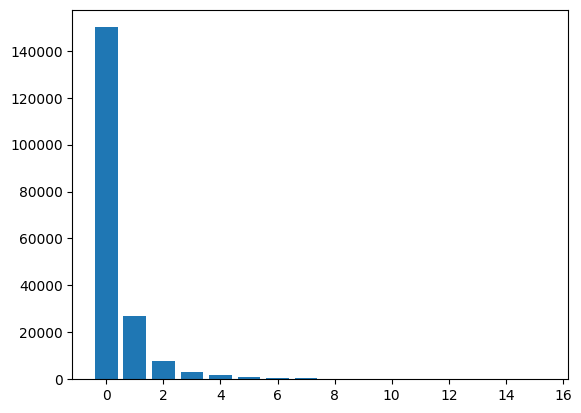

In [14]:
from matplotlib import pyplot as plt
plt.bar(ships_counts.keys(), ships_counts.values())
plt.show()